## Crafting a Decision Tree Classifier from Scratch for Predicting Iris Species

<h4> In this project, we embark on a journey to create a robust classification model for Iris flowers using decision trees from scratch, bypassing the convenience of libraries like scikit-learn. </h4>

## UNDERSTANDING THE DATA

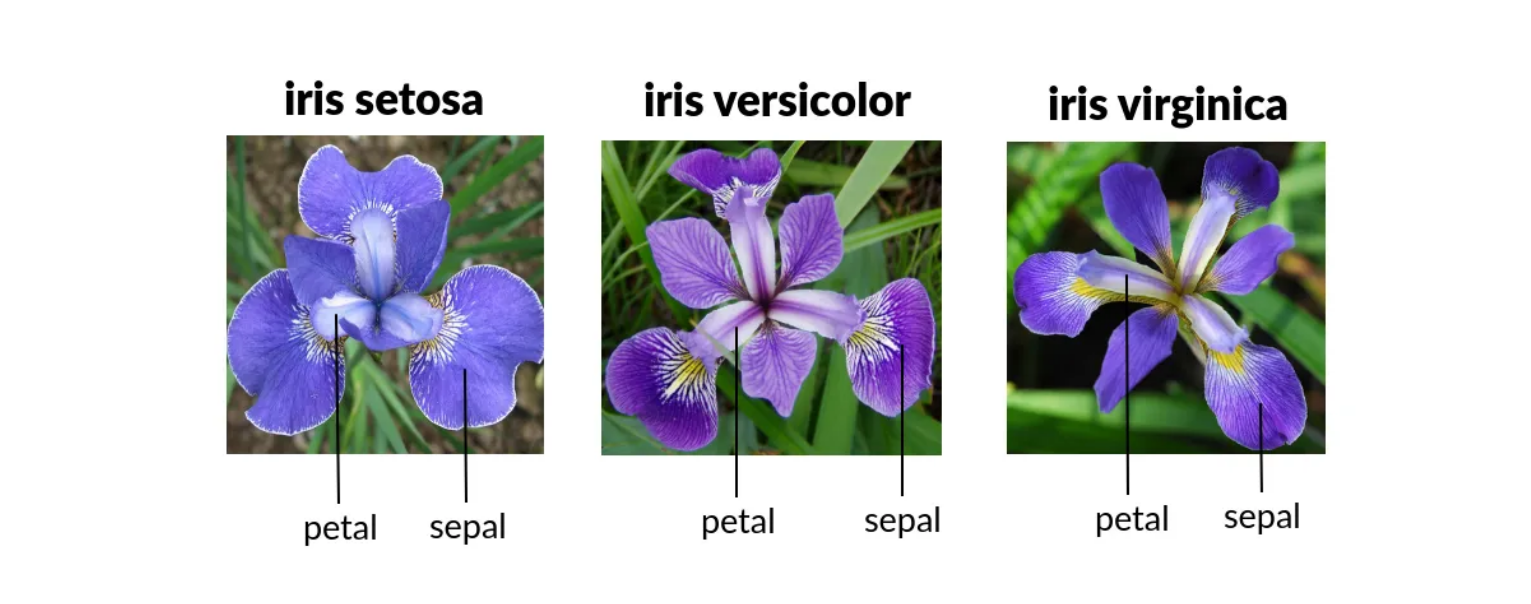

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("data.csv")

In [2]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
data.shape

(150, 6)

<h3> CLEANING DATA </h3>

In [5]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data.drop(labels = 'Id',axis =1,inplace=True) 

In [7]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## PLOTTING THE DATA

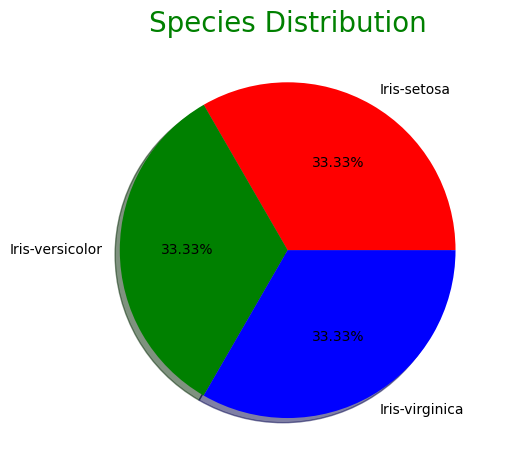

In [9]:
import matplotlib.pyplot as plt
ax = plt.subplot(1,1, 1)
species_count = data['Species'].value_counts()
colors = ['red', 'green', 'blue']
ax.pie(species_count, labels=species_count.index, autopct='%1.2f%%', shadow=True, colors=colors)
ax.set_title("Species Distribution", color='Green', loc='center', fontsize=20)

plt.tight_layout()
plt.show()

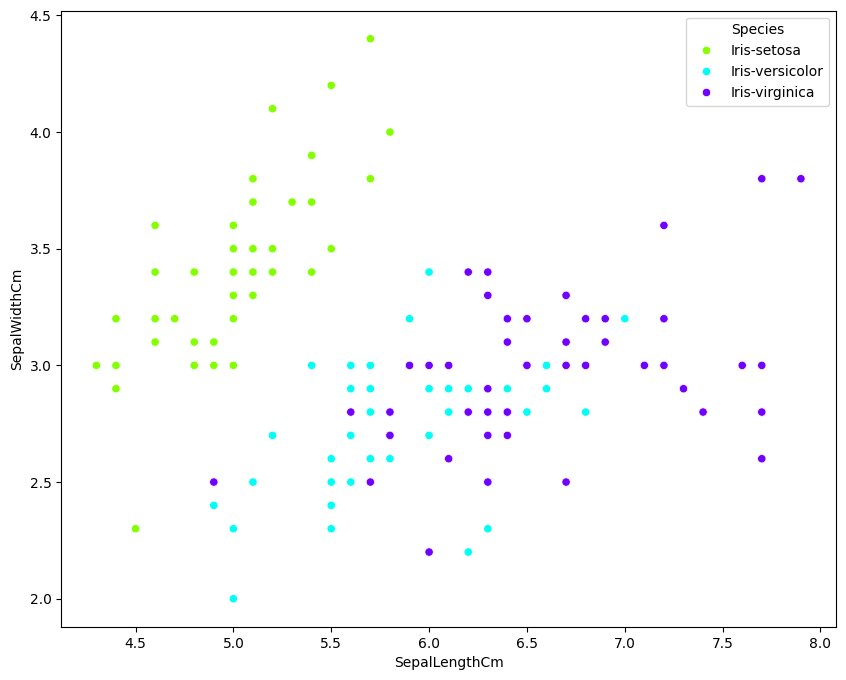

In [10]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x="SepalLengthCm", y="SepalWidthCm", hue="Species",palette="hsv")
plt.show()

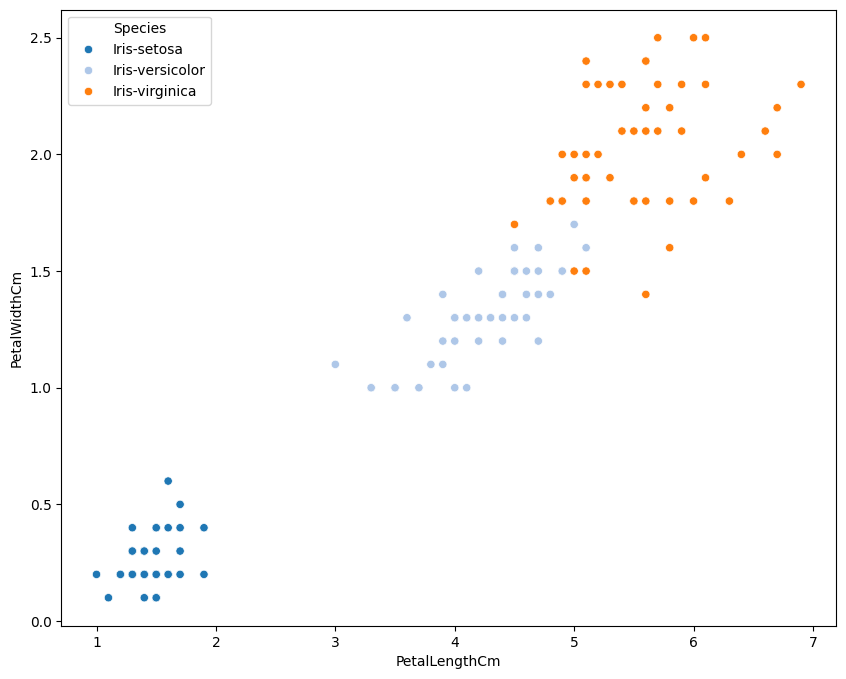

In [11]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x="PetalLengthCm", y="PetalWidthCm", hue="Species",palette="tab20")
plt.show()

## LABEL ENCODING

In [12]:
data['Species'].replace(to_replace=["Iris-setosa","Iris-versicolor","Iris-virginica"],value=[0,1,2],inplace=True)
#Here we are label encoding the two values in Diagnosis column to numbers, Iris-setosa =0, Iris-versicolor=1 and Iris-virginica =2

In [13]:
data['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

## BUILDING DECISION TREE CLASSIFIER 

<h3>A decision tree classifier is a type of algorithm used in machine learning for solving classification problems. It mimics the process of decision-making by creating a tree-like model of decisions and their possible consequences. At each node of the tree, the algorithm selects the best feature to make a decision, splitting the data into branches. This process continues recursively until it reaches a leaf node, where a prediction or classification is made. It's a popular and intuitive method for both understanding and predicting outcomes based on input features.</h3>

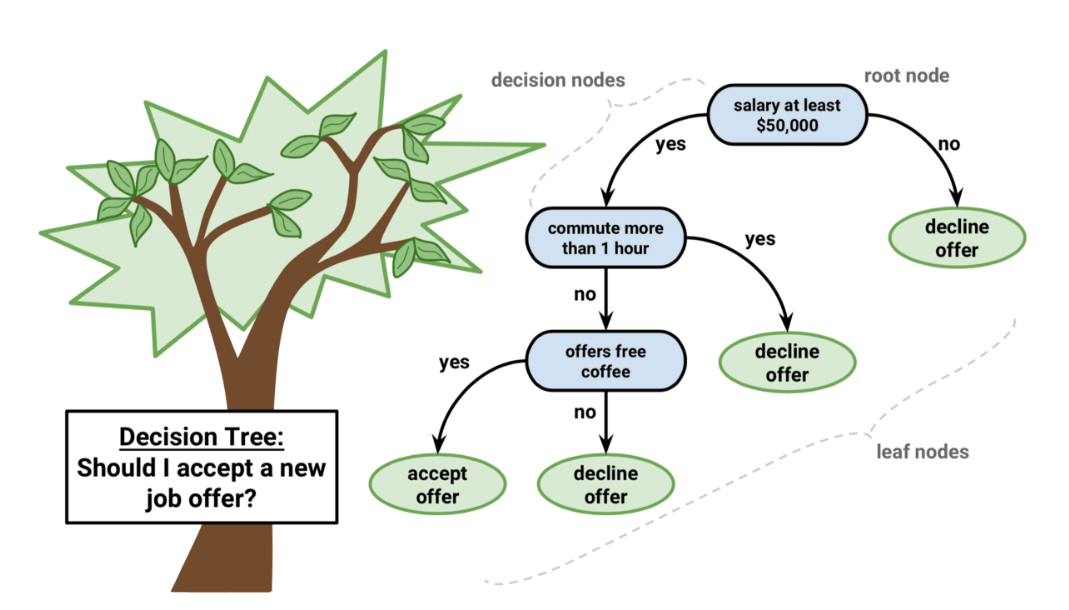

## MATHEMATICAL REPRESENTATION

In [14]:
from IPython.display import Latex

def latex_entropy():
  """LaTeX representation of Entropy with a bulleted explanation."""
  latex_repr = r"""
  $Entropy (H)$ is a measure of uncertainty associated with a random variable. It represents the average amount of information needed to identify the outcome of a random event. Higher entropy indicates greater uncertainty.

  Mathematically, entropy is defined as:

  $$ Entropy = -\sum_{i=1}^{n} p_i \log_2(p_i) $$

  $n:$ Number of possible outcomes. 
  $p_i:$ Probability of the i-th outcome (where i ranges from 1 to n).
  $log_2:$ Logarithm base 2.
  """
  return latex_repr

# Display the LaTeX representation
Latex(latex_entropy())


<IPython.core.display.Latex object>

In [15]:
from IPython.display import Latex

def latex_information_gain():
  """LaTeX representation of Information Gain with a short description."""
  latex_repr = r"""
  $Information Gain (IG)$ is a measure used in decision tree learning to determine the effectiveness of a feature in splitting a dataset. It quantifies the reduction in uncertainty (entropy) that a feature brings to the classification task. Higher information gain indicates that the feature is more useful for distinguishing between different classes.

  Mathematically, information gain is defined as:

  $$ IG = E(parent) - \sum_{i=1}^{m} \frac{n_i}{N} E(child_i) $$

   $ IG $ is the information gain.
   $ E(parent) $ is the entropy of the parent node (before the split).
   $ m $ is the number of child nodes (after the split).
   $ n_i $  is the number of instances in child node i.
   $ N $ is the total number of instances in the parent node.
   $ E(child_i)$ is the entropy of child node i.
  """
  return latex_repr

# Display the LaTeX representation
Latex(latex_information_gain())


<IPython.core.display.Latex object>

 ## BUILDING DECISION TREE CLASSIFIER FROM SCRATCH

In [16]:
class Node():
    """
    A class representing a node in a decision tree.
    """

    def __init__(self, feature=None, threshold=None, left=None, right=None, gain=None, value=None):
        """
        Initializes a new instance of the Node class.

        Args:
            feature: The feature used for splitting at this node. Defaults to None.
            threshold: The threshold used for splitting at this node. Defaults to None.
            left: The left child node. Defaults to None.
            right: The right child node. Defaults to None.
            gain: The gain of the split. Defaults to None.
            value: If this node is a leaf node, this attribute represents the predicted value
                for the target variable. Defaults to None.
        """
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.gain = gain
        self.value = value

### `class Node():`
This line defines the start of the `Node` class.

### `def __init__(self, feature=None, threshold=None, left=None, right=None, gain=None, value=None):`
This is the constructor method of the `Node` class, which initializes a new instance of the node.

- **`feature`:** Represents the feature used for splitting at this node. If this node is an internal node, it specifies the feature used for splitting. If it's a leaf node, it's set to `None`. 

- **`threshold`:** Represents the threshold value used for splitting at this node. Similar to `feature`, if the node is an internal node, it specifies the threshold value. If it's a leaf node, it's set to `None`.

- **`left`:** Represents the left child node of the current node. This node contains instances where the feature's value is less than or equal to the threshold.

- **`right`:** Represents the right child node of the current node. This node contains instances where the feature's value is greater than the threshold.

- **`gain`:** Represents the gain achieved by splitting at this node. It's a measure of the information gain or impurity reduction due to the split.

- **`value`:** Represents the predicted value for the target variable if this node is a leaf node. If the node is not a leaf node, this attribute is set to `None`.

The constructor initializes the attributes of the node based on the provided arguments, or it sets them to `None` if no arguments are provided. This structure allows for the creation of both internal and leaf nodes in a decision tree.


In [17]:
class DecisionTree():
    """
    A decision tree classifier for binary classification problems.
    """

    def __init__(self, min_samples=2, max_depth=2):
        """
        Constructor for DecisionTree class.

        Parameters:
            min_samples (int): Minimum number of samples required to split an internal node.
            max_depth (int): Maximum depth of the decision tree.
        """
        self.min_samples = min_samples
        self.max_depth = max_depth

    def split_data(self, dataset, feature, threshold):
        """
        Splits the given dataset into two datasets based on the given feature and threshold.

        Parameters:
            dataset (ndarray): Input dataset.
            feature (int): Index of the feature to be split on.
            threshold (float): Threshold value to split the feature on.

        Returns:
            left_dataset (ndarray): Subset of the dataset with values less than or equal to the threshold.
            right_dataset (ndarray): Subset of the dataset with values greater than the threshold.
        """
        # Create empty arrays to store the left and right datasets
        left_dataset = []
        right_dataset = []
        
        # Loop over each row in the dataset and split based on the given feature and threshold
        for row in dataset:
            if row[feature] <= threshold:
                left_dataset.append(row)
            else:
                right_dataset.append(row)

        # Convert the left and right datasets to numpy arrays and return
        left_dataset = np.array(left_dataset)
        right_dataset = np.array(right_dataset)
        return left_dataset, right_dataset

    def entropy(self, y):
        """
        Computes the entropy of the given label values.

        Parameters:
            y (ndarray): Input label values.

        Returns:
            entropy (float): Entropy of the given label values.
        """
        entropy = 0

        # Find the unique label values in y and loop over each value
        labels = np.unique(y)
        for label in labels:
            # Find the examples in y that have the current label
            label_examples = y[y == label]
            # Calculate the ratio of the current label in y
            pl = len(label_examples) / len(y)
            # Calculate the entropy using the current label and ratio
            entropy += -pl * np.log2(pl)

        # Return the final entropy value
        return entropy

    def information_gain(self, parent, left, right):
        """
        Computes the information gain from splitting the parent dataset into two datasets.

        Parameters:
            parent (ndarray): Input parent dataset.
            left (ndarray): Subset of the parent dataset after split on a feature.
            right (ndarray): Subset of the parent dataset after split on a feature.

        Returns:
            information_gain (float): Information gain of the split.
        """
        # set initial information gain to 0
        information_gain = 0
        # compute entropy for parent
        parent_entropy = self.entropy(parent)
        # calculate weight for left and right nodes
        weight_left = len(left) / len(parent)
        weight_right= len(right) / len(parent)
        # compute entropy for left and right nodes
        entropy_left, entropy_right = self.entropy(left), self.entropy(right)
        # calculate weighted entropy 
        weighted_entropy = weight_left * entropy_left + weight_right * entropy_right
        # calculate information gain 
        information_gain = parent_entropy - weighted_entropy
        return information_gain

    
    def best_split(self, dataset, num_samples, num_features):
        """
        Finds the best split for the given dataset.

        Args:
        dataset (ndarray): The dataset to split.
        num_samples (int): The number of samples in the dataset.
        num_features (int): The number of features in the dataset.

        Returns:
        dict: A dictionary with the best split feature index, threshold, gain, 
              left and right datasets.
        """
        # dictionary to store the best split values
        best_split = {'gain':- 1, 'feature': None, 'threshold': None}
        # loop over all the features
        for feature_index in range(num_features):
            #get the feature at the current feature_index
            feature_values = dataset[:, feature_index]
            #get unique values of that feature
            thresholds = np.unique(feature_values)
            # loop over all values of the feature
            for threshold in thresholds:
                # get left and right datasets
                left_dataset, right_dataset = self.split_data(dataset, feature_index, threshold)
                # check if either datasets is empty
                if len(left_dataset) and len(right_dataset):
                    # get y values of the parent and left, right nodes
                    y, left_y, right_y = dataset[:, -1], left_dataset[:, -1], right_dataset[:, -1]
                    # compute information gain based on the y values
                    information_gain = self.information_gain(y, left_y, right_y)
                    # update the best split if conditions are met
                    if information_gain > best_split["gain"]:
                        best_split["feature"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["left_dataset"] = left_dataset
                        best_split["right_dataset"] = right_dataset
                        best_split["gain"] = information_gain
        return best_split

    
    def calculate_leaf_value(self, y):
        """
        Calculates the most occurring value in the given list of y values.

        Args:
            y (list): The list of y values.

        Returns:
            The most occurring value in the list.
        """
        y = list(y)
        #get the highest present class in the array
        most_occuring_value = max(y, key=y.count)
        return most_occuring_value
    
    def build_tree(self, dataset, current_depth=0):
        """
        Recursively builds a decision tree from the given dataset.

        Args:
        dataset (ndarray): The dataset to build the tree from.
        current_depth (int): The current depth of the tree.

        Returns:
        Node: The root node of the built decision tree.
        """
        # split the dataset into X, y values
        X, y = dataset[:, :-1], dataset[:, -1]
        n_samples, n_features = X.shape
        # keeps spliting until stopping conditions are met
        if n_samples >= self.min_samples and current_depth <= self.max_depth:
            # Get the best split
            best_split = self.best_split(dataset, n_samples, n_features)
            # Check if gain isn't zero
            if best_split["gain"]:
                # continue splitting the left and the right child. Increment current depth
                left_node = self.build_tree(best_split["left_dataset"], current_depth + 1)
                right_node = self.build_tree(best_split["right_dataset"], current_depth + 1)
                # return decision node
                return Node(best_split["feature"], best_split["threshold"],
                            left_node, right_node, best_split["gain"])

        # compute leaf node value
        leaf_value = self.calculate_leaf_value(y)
        # return leaf node value
        return Node(value=leaf_value)
    
    def fit(self, X, y):
        """
        Builds and fits the decision tree to the given X and y values.

        Args:
        X (ndarray): The feature matrix.
        y (ndarray): The target values.
        """
        dataset = np.concatenate((X, y), axis=1)  
        self.root = self.build_tree(dataset)

    def predict(self, X):
        """
        Predicts the class labels for each instance in the feature matrix X.

        Args:
        X (ndarray): The feature matrix to make predictions for.

        Returns:
        list: A list of predicted class labels.
        """
        # Create an empty list to store the predictions
        predictions = []
        # For each instance in X, make a prediction by traversing the tree
        for x in X:
            prediction = self.make_prediction(x, self.root)
            # Append the prediction to the list of predictions
            predictions.append(prediction)
        # Convert the list to a numpy array and return it
        np.array(predictions)
        return predictions
    
    def make_prediction(self, x, node):
        """
        Traverses the decision tree to predict the target value for the given feature vector.

        Args:
        x (ndarray): The feature vector to predict the target value for.
        node (Node): The current node being evaluated.

        Returns:
        The predicted target value for the given feature vector.
        """
        # if the node has value i.e it's a leaf node extract it's value
        if node.value != None: 
            return node.value
        else:
            #if it's node a leaf node we'll get it's feature and traverse through the tree accordingly
            feature = x[node.feature]
            if feature <= node.threshold:
                return self.make_prediction(x, node.left)
            else:
                return self.make_prediction(x, node.right)

### `class DecisionTree():`
This line introduces the `DecisionTree` class, which represents a decision tree classifier for classification problems.

### `def __init__(self, min_samples=2, max_depth=2):`
This is the constructor method of the `DecisionTree` class, used to initialize a new instance of the decision tree.

- **`min_samples (int)`:** Represents the minimum number of samples required to split an internal node. Defaults to 2.
- **`max_depth (int)`:** Represents the maximum depth of the decision tree. Defaults to 2.

### `def split_data(self, dataset, feature, threshold):`
This method splits the given dataset into two datasets based on the given feature and threshold.

- **`dataset (ndarray)`:** Input dataset.
- **`feature (int)`:** Index of the feature to be split on.
- **`threshold (float)`:** Threshold value to split the feature on.

Returns:
- **`left_dataset (ndarray)`:** Subset of the dataset with values less than or equal to the threshold.
- **`right_dataset (ndarray)`:** Subset of the dataset with values greater than the threshold.

### `def entropy(self, y):`
This method computes the entropy of the given label values.

- **`y (ndarray)`:** Input label values.

Returns:
- **`entropy (float)`:** Entropy of the given label values.

### `def information_gain(self, parent, left, right):`
This method computes the information gain from splitting the parent dataset into two datasets.

- **`parent (ndarray)`:** Input parent dataset.
- **`left (ndarray)`:** Subset of the parent dataset after split on a feature.
- **`right (ndarray)`:** Subset of the parent dataset after split on a feature.

Returns:
- **`information_gain (float)`:** Information gain of the split.

### `def best_split(self, dataset, num_samples, num_features):`
This method finds the best split for the given dataset.

- **`dataset (ndarray)`:** The dataset to split.
- **`num_samples (int)`:** The number of samples in the dataset.
- **`num_features (int)`:** The number of features in the dataset.

Returns:
- **`dict`:** A dictionary with the best split feature index, threshold, gain, left and right datasets.

### `def calculate_leaf_value(self, y):`
This method calculates the most occurring value in the given list of y values.

- **`y (list)`:** The list of y values.

Returns:
- **`The most occurring value in the list.`**

### `def build_tree(self, dataset, current_depth=0):`
This method recursively builds a decision tree from the given dataset.

- **`dataset (ndarray)`:** The dataset to build the tree from.
- **`current_depth (int)`:** The current depth of the tree.

Returns:
- **`Node`:** The root node of the built decision tree.

### `def fit(self, X, y):`
This method builds and fits the decision tree to the given X and y values.

- **`X (ndarray)`:** The feature matrix.
- **`y (ndarray)`:** The target values.

### `def predict(self, X):`
This method predicts the class labels for each instance in the feature matrix X.

- **`X (ndarray)`:** The feature matrix to make predictions for.

Returns:
- **`list`:** A list of predicted class labels.

### `def make_prediction(self, x, node):`
This method traverses the decision tree to predict the target value for the given feature vector.

- **`x (ndarray)`:** The feature vector to predict the target value for.
- **`node (Node)`:** The current node being evaluated.

Returns:
- **`The predicted target value for the given feature vector.`**

## SPLITTING INTO TRAIN - TEST DATA 

In [18]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
Y = data[['Species']].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=41, test_size=0.2)

In [20]:
import pandas as pd

# Assuming Y_train is a NumPy array
series = pd.Series(Y_train.flatten())  # Create a Pandas Series from Y_train

# Count occurrences of each unique target class
value_counts = series.value_counts()

print(value_counts)

0    41
2    40
1    39
Name: count, dtype: int64


In [21]:
import pandas as pd

# Assuming Y_test is a NumPy array
series = pd.Series(Y_test.flatten())  # Create a Pandas Series from Y_train

# Count occurrences of each unique target class
value_counts = series.value_counts()

print(value_counts)

1    11
2    10
0     9
Name: count, dtype: int64


In [22]:
#create model instance
model = DecisionTree(2, 2)

# Fit the decision tree model to the training data.
model.fit(X_train, Y_train)

# Use the trained model to make predictions on the test data.
predictions = model.predict(X_test)

## TESTING THE MODEL

In [23]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, confusion_matrix

# ... rest of your code (model training, prediction, etc.)

# Calculate confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[ 9  0  0]
 [ 0  8  3]
 [ 0  0 10]]


 A 3x3 table that summarizes the performance of a classification model with three target classes. Let's break down what each element represents and how to interpret the overall performance:

Structure:

Each row represents the actual class (ground truth) for a data point in the test set.
Each column represents the class predicted by your model.

Elements:

[9, 0, 0]: This row indicates that for data points that actually belong to class 1 (represented by the first column), your model correctly predicted 9 of them as class 1 (true positives), and none were misclassified as class 2 or class 3 (false positives).

[0, 8, 3]: This row shows that for data points that actually belong to class 2, your model correctly predicted 8 of them (true positives), but 3 were incorrectly classified as class 3 (false positives). No data points were misclassified as class 1 (false negatives).

[0, 0, 10]: This row represents that all 10 data points that actually belong to class 3 were correctly predicted by your model (true positives). There were no false positives or false negatives for class 3.

In [24]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score
accuracy = accuracy_score(Y_test, predictions)
print(f"Model's Accuracy: {accuracy}")

# Compute balanced accuracy
balanced_accuracy = balanced_accuracy_score(Y_test, predictions)
print(f"Model's Balanced Accuracy: {balanced_accuracy}")

# Compute precision
precision = precision_score(Y_test, predictions, average='weighted')  # Using weighted averaging for multiclass
print(f"Model's Precision: {precision}")

Model's Accuracy: 0.9
Model's Balanced Accuracy: 0.9090909090909092
Model's Precision: 0.9230769230769231


In [25]:
import pickle

# Save the trained model to a file
pickle.dump(model, open('model.pkl', 'wb'))
